# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). The dataset you will be working on is CIFAR-10. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  
    1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  
    1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  
    1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?  
    2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?  
    2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  
    2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?  
    2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?  

The dataset you will be working on is CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. **You have to ensure the architecture meets this constraint by verifying and printing out the number of parameters with model.summary(). Please follow the submission format to be eligible for this extra credit.**

### Deadline {-}
Please visit Canvas for details.

In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [23]:

tf.config.set_visible_devices([], 'GPU')


In [24]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)
y_test = y_test.reshape(-1,)


print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000,)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000,)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000,)


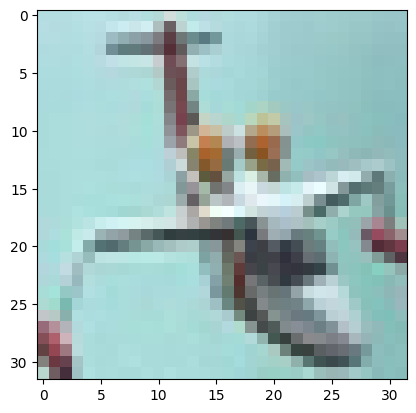

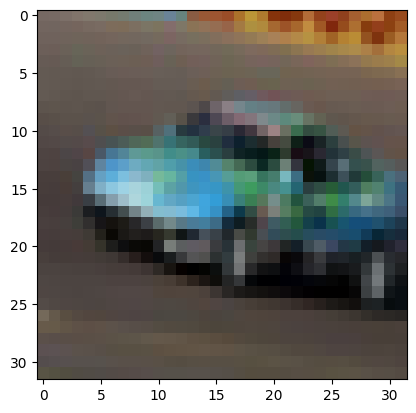

In [25]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[44999])
plt.show()
imgplot = plt.imshow(X_test[4999])
plt.show()

## 1. Coding tasks

1. Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.

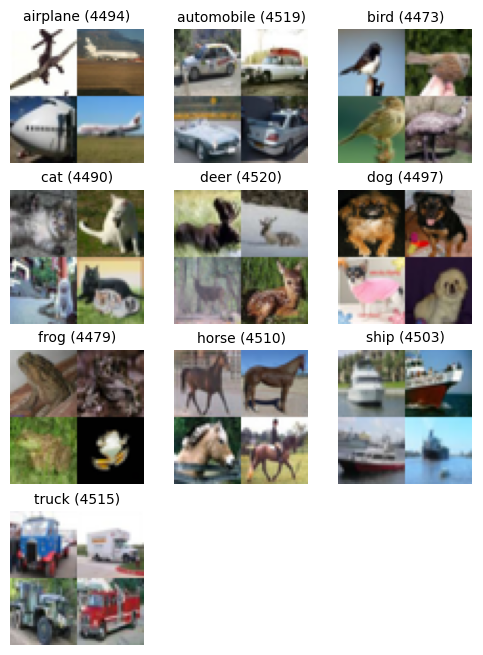

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Count how many samples belong to each class
class_counts = np.bincount(y_train.flatten(), minlength=10)

# For each class, collect indices of all images
class_indices = {i: np.where(y_train.flatten() == i)[0] for i in range(10)}

# Plot setup
fig, axes = plt.subplots(4, 3, figsize=(6, 8))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]

    # Randomly pick 4 images from this class
    idxs = np.random.choice(class_indices[i], 4, replace=False)
    imgs = X_train[idxs]

    # Create a small 2x2 grid inside the subplot
    combined = np.zeros((64, 64, 3), dtype=np.uint8)  # 32*2 = 64 pixels per side
    combined[:32, :32] = imgs[0]
    combined[:32, 32:] = imgs[1]
    combined[32:, :32] = imgs[2]
    combined[32:, 32:] = imgs[3]

    ax.imshow(combined)
    ax.set_title(f"{class_names[i]} ({class_counts[i]})", fontsize=10)
    ax.axis("off")

# Turn off remaining unused subplots
for ax in axes[10:]:
    ax.axis("off")

plt.show()


In [27]:
# Convert pixel values from 0–255 to 0–1 (normalizing)
X_train_norm = X_train.astype("float32") / 255.0
X_val_norm = X_val.astype("float32") / 255.0
X_test_norm = X_test.astype("float32") / 255.0

print("Data normalized: pixel values are now between 0 and 1.")
print("Random normalized pixel: ", X_train_norm[44998][16][16])

Data normalized: pixel values are now between 0 and 1.
Random normalized pixel:  [0.09803922 0.07058824 0.0627451 ]


2. First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers

In [28]:
# #single gpu
# device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# print("Training on:", device)

# # Convert to tensors
# X_train_t = torch.tensor(X_train_norm, dtype=torch.float32).permute(0, 3, 1, 2)
# X_val_t   = torch.tensor(X_val_norm, dtype=torch.float32).permute(0, 3, 1, 2)
# X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32).permute(0, 3, 1, 2)

# y_train_t = torch.tensor(y_train.reshape(-1), dtype=torch.long)
# y_val_t   = torch.tensor(y_val.reshape(-1), dtype=torch.long)
# y_test_t  = torch.tensor(y_test.reshape(-1), dtype=torch.long)

# train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=128, shuffle=True)
# val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=128)
# test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=128)


# # -------------------------
# # Model
# # -------------------------
# class MyCNN(nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         self.block1 = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Conv2d(64, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.MaxPool2d(2)
#         )

#         self.block2 = nn.Sequential(
#             nn.Conv2d(64, 128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),
#             nn.Conv2d(128, 128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),
#             nn.MaxPool2d(2)
#         )

#         self.block3 = nn.Sequential(
#             nn.Conv2d(128, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(256),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.BatchNorm2d(256),
#         )

#         self.gap = nn.AdaptiveAvgPool2d((1, 1))

#         self.fc = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(256, 512),
#             nn.ReLU(),
#             nn.Dropout(0.35),
#             nn.Linear(512, 10)
#         )
        
#     def forward(self, x):
#         x = self.block1(x)
#         x = self.block2(x)
#         x = self.block3(x)
#         x = self.gap(x)
#         x = self.fc(x)
#         return x

# model = MyCNN().to(device)
# print(model)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)


# # -------------------------
# # Train + Evaluate
# # -------------------------
# train_losses = []
# val_accuracies = []

# def train_one_epoch():
#     model.train()
#     total_loss = 0

#     for X, y in train_loader:
#         X, y = X.to(device), y.to(device)

#         optimizer.zero_grad()
#         outputs = model(X)
#         loss = criterion(outputs, y)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     return total_loss / len(train_loader)

# def evaluate(loader):
#     model.eval()
#     correct = 0
#     total = 0

#     with torch.no_grad():
#         for X, y in loader:
#             X, y = X.to(device), y.to(device)
#             pred = model(X).argmax(1)
#             correct += (pred == y).sum().item()
#             total += y.size(0)

#     return correct / total


# # -------------------------
# # Run training
# # -------------------------
# for epoch in range(1, 31):
#     train_loss = train_one_epoch()
#     val_acc = evaluate(val_loader)

#     train_losses.append(train_loss)
#     val_accuracies.append(val_acc)

#     print(f"Epoch {epoch:2d} | Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

# # -------------------------
# # Test accuracy
# # -------------------------
# test_acc = evaluate(test_loader)
# print("Test accuracy:", test_acc)


In [29]:
# # Visualize training and validation performance
# f, ax = plt.subplots(2, 1, figsize=(4, 5))

# # Plot training loss
# ax[0].plot(train_losses, color='b', label='Training Loss')
# ax[0].set_title("Training Loss")
# ax[0].set_xlabel("Epoch")
# ax[0].set_ylabel("Loss")
# ax[0].legend()

# # Plot validation accuracy
# ax[1].plot(val_accuracies, color='r', label='Validation Accuracy')
# ax[1].set_title("Validation Accuracy")
# ax[1].set_xlabel("Epoch")
# ax[1].set_ylabel("Accuracy")
# ax[1].legend()

# plt.tight_layout()
# plt.show()


3. Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as T

In [ ]:

CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD = (0.2023, 0.1994, 0.2010)

transform_train = T.Compose([
    T.ToPILImage(),
    T.RandomHorizontalFlip(),
    T.RandomCrop(32, padding=4),
    T.RandomRotation(15),
    T.ToTensor(),
    T.Normalize(CIFAR10_MEAN, CIFAR10_STD)
])

transform_test = T.Compose([
    T.ToTensor(),
    T.Normalize(CIFAR10_MEAN, CIFAR10_STD)
])

X_train_pt = torch.tensor(X_train, dtype=torch.uint8)
y_train_pt = torch.tensor(y_train, dtype=torch.long).squeeze()

X_val_pt = torch.tensor(X_val, dtype=torch.uint8)
y_val_pt = torch.tensor(y_val, dtype=torch.long).squeeze()

X_test_pt = torch.tensor(X_test, dtype=torch.uint8)
y_test_pt = torch.tensor(y_test, dtype=torch.long).squeeze()


class CIFARWrapper(torch.utils.data.Dataset):
    def __init__(self, X, y, transform):
        self.X = X
        self.y = y
        self.transform = transform
    def __len__(self):
        return len(self.X)
    def __getitem__(self, i):
        return self.transform(self.X[i].numpy()), self.y[i]

train_ds = CIFARWrapper(X_train_pt, y_train_pt, transform_train)
val_ds   = CIFARWrapper(X_val_pt,   y_val_pt,   transform_test)
test_ds  = CIFARWrapper(X_test_pt,  y_test_pt,  transform_test)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=128)
test_loader  = DataLoader(test_ds,  batch_size=128)


In [32]:
class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, 4*growth_rate, kernel_size=1)
        self.bn2 = nn.BatchNorm2d(4*growth_rate)
        self.conv2 = nn.Conv2d(4*growth_rate, growth_rate, kernel_size=3, padding=1)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = self.conv2(F.relu(self.bn2(out)))
        return torch.cat([x, out], 1)
    

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super().__init__()
        layers = []
        for i in range(num_layers):
            layers.append(DenseLayer(in_channels + i*growth_rate, growth_rate))
        self.layers = nn.Sequential(*layers)
        self.out_channels = in_channels + num_layers*growth_rate

    def forward(self, x):
        return self.layers(x)


class Transition(nn.Module):
    def __init__(self, in_channels, reduction=0.5):
        super().__init__()
        out_channels = int(in_channels * reduction)
        self.bn = nn.BatchNorm2d(in_channels)
        self.conv = nn.Conv2d(in_channels, out_channels, 1)
        self.pool = nn.AvgPool2d(2,2)
        self.dropout = nn.Dropout(0.2)

        self.out_channels = out_channels

    def forward(self, x):
        x = self.conv(F.relu(self.bn(x)))
        x = self.dropout(x)
        return self.pool(x)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SmallDenseNet(nn.Module):
    def __init__(self, growth=24):
        super().__init__()

        self.conv0 = nn.Conv2d(3, 32, 3, padding=1)

        # Blocks like your Keras model
        self.db1 = DenseBlock(32, growth, 6)
        self.tr1 = Transition(self.db1.out_channels)

        self.db2 = DenseBlock(self.tr1.out_channels, growth, 12)
        self.tr2 = Transition(self.db2.out_channels)

        self.db3 = DenseBlock(self.tr2.out_channels, growth, 18)
        self.tr3 = Transition(self.db3.out_channels)

        self.db4 = DenseBlock(self.tr3.out_channels, growth, 24)

        self.bn = nn.BatchNorm2d(self.db4.out_channels)
        self.dropout = nn.Dropout(0.15)
        self.fc = nn.Linear(self.db4.out_channels, 10)

    def forward(self, x):
        x = self.conv0(x)

        x = self.db1(x)
        x = self.tr1(x)

        x = self.db2(x)
        x = self.tr2(x)

        x = self.db3(x)
        x = self.tr3(x)

        x = self.db4(x)

        x = F.relu(self.bn(x))
        x = F.adaptive_avg_pool2d(x, (1,1)).squeeze()
        x = self.dropout(x)

        return self.fc(x)

model = SmallDenseNet().to(device)

num_params = sum(p.numel() for p in model.parameters())/1e6
print(f"Model has {num_params:.2f} M parameters")


Model has 1.03 M parameters


In [34]:
from torch.optim.lr_scheduler import MultiStepLR


# --- Old:
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# --- New Classic SGD Setup:
# Initial Learning Rate (LR) is high
initial_lr = 0.1
# Weight Decay (L2) is crucial for generalization
weight_decay = 5e-4 

optimizer = optim.SGD(
    model.parameters(), 
    lr=initial_lr, 
    momentum=0.9, 
    weight_decay=weight_decay
)

scheduler = MultiStepLR(optimizer, milestones=[150, 225], gamma=0.1)

criterion = nn.CrossEntropyLoss()

def train_epoch():
    model.train()
    total, correct, loss_sum = 0, 0, 0
    
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()
        correct += (pred.argmax(1) == y).sum().item()
        total += y.size(0)

    return loss_sum/len(train_loader), correct/total


def validate():
    model.eval()
    total, correct, loss_sum = 0, 0, 0

    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = criterion(pred, y)

            loss_sum += loss.item()
            correct += (pred.argmax(1) == y).sum().item()
            total += y.size(0)

    return loss_sum/len(val_loader), correct/total


In [ ]:
# --- Initialize Lists to Store Metrics ---
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val = 999
patience = 30
wait = 0

for epoch in range(300):
    train_loss, train_acc = train_epoch()
    val_loss, val_acc = validate()
    
    scheduler.step()    

    print(f"Epoch {epoch+1}: train_acc={train_acc:.3f}, val_acc={val_acc:.3f}")

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    if val_loss < best_val:
        best_val = val_loss
        wait = 0
        torch.save(model.state_dict(), "best_small_densenet.pth")
    else:
        wait += 1

    if wait >= patience:
        print("Early stopping!")
        break


Epoch 1: train_acc=0.377, val_acc=0.420
Epoch 2: train_acc=0.549, val_acc=0.598
Epoch 3: train_acc=0.634, val_acc=0.649
Epoch 4: train_acc=0.687, val_acc=0.670
Epoch 5: train_acc=0.725, val_acc=0.668
Epoch 6: train_acc=0.753, val_acc=0.720


KeyboardInterrupt: 

In [ ]:
# --- Plotting Cell ---

epochs_ran = range(len(train_losses))

plt.figure(figsize=(5, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_ran, train_losses, label='Training Loss')
plt.plot(epochs_ran, val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (CrossEntropy)')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_ran, train_accuracies, label='Training Accuracy')
plt.plot(epochs_ran, val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#

In [ ]:
model.load_state_dict(torch.load("best_small_densenet.pth"))
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        correct += (pred.argmax(1) == y).sum().item()
        total += y.size(0)

print("TEST ACCURACY =", correct / total)


4. Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.

In [ ]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.4

## 2. Open discussion questions

1. How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?

In [ ]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.1

2. How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?

In [ ]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.2

3. How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.

In [ ]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.3

4. Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?

In [ ]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.4

5. What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?

In [ ]:
# Your argument goes here. Please include data visualization and analysis to back up your argument.
# 2.5